In [58]:
import sys
import numpy as np
import pandas as pd
from plotnine import *
from plotnine import __version__ as p9__version__
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import __version__ as sk__version__

print("python", sys.version,
      "\nnumpy", np.__version__,
      "\npandas", pd.__version__,
      "\nplotnine", p9__version__,
      "\nstatsmodels", sm.__version__,
      "\nsklearn", sk__version__)

python 3.10.2 (tags/v3.10.2:a58ebcc, Jan 17 2022, 14:12:15) [MSC v.1929 64 bit (AMD64)] 
numpy 1.22.3 
pandas 1.4.2 
plotnine 0.8.0 
statsmodels 0.13.2 
sklearn 1.1.1


In [59]:
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [60]:
def opera_to_df(input):
    # Import Raw
    raw_df = pd.read_csv(input, sep = '\t', skiprows = 9)
    raw_df = raw_df.dropna(axis = 'columns')
    return raw_df

In [62]:
coloc_set = opera_to_df('real_data/Objects_Population - coloc_wt_plus.csv')
coloc_set = coloc_set.sort_values(by = ['coloc - Spot Contrast'], ascending = False)
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [63]:
pos_column_1 = [0,1,1,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,0,0,0,0,1,0,0,1,0,1]
pos_column_2 = [1,1,1,0,0,1,0,0,0,1,0,1,1,1,1,0,1,0,1,1,0,1,0,1,1,1,0,1,1,1,1,0,1,1,1,0,1,0]
pos_column_3 = [0,0,1,0,1,0,1,1,1,1,1,0,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0]
pos_column_4 = [1,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0]
pos_column_5 = [0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1]

pos_combined = pos_column_1 + pos_column_2 + pos_column_3 + pos_column_4 + pos_column_5
print(len(pos_combined))

188


In [64]:
n_pos_rest = len(coloc_set) - len(pos_combined)
pos_rest = [0 for i in range(n_pos_rest)]

pos_combined_full = pos_combined + pos_rest

In [65]:
coloc_set['true colocalization'] = pos_combined_full

In [66]:
coloc_set[188:212]

,Row,Column,Plane,Timepoint,Field,Object No,X,Y,Bounding Box,Position X [µm],Position Y [µm],coloc - Spot Contrast,coloc - Spot Area [px²],coloc - Spot To Region Intensity,coloc - Object No in Nuclei Selected,coloc - Object No in Spots AR,true colocalization
244,4,8,7,64,4,2,250,1039,"[247,1037,253,1043]",523.18,-962.85,0.070276,33,0.818996,21,20,0
43,4,8,1,32,5,1,1616,626,"[1612,622,1619,632]",-243.70,-901.85,0.070261,60,1.011605,6,4,0
94,4,8,4,36,5,1,650,276,"[646,274,655,280]",-386.32,-850.09,0.070212,42,1.257266,8,10,0
7,4,8,3,34,3,1,1294,953,"[1290,950,1298,958]",677.46,-304.42,0.070186,41,1.021859,6,2,0
230,4,8,7,43,5,1,1884,2156,"[1882,2154,1886,2158]",-204.02,-1127.87,0.069883,18,0.974760,3,1,0
239,4,8,1,51,4,1,1351,1261,"[1349,1259,1354,1267]",685.98,-995.79,0.069861,42,0.949460,6,10,0
339,4,8,2,40,1,1,789,1634,"[785,1630,793,1639]",-365.82,-404.89,0.069822,51,1.047000,2,2,0
49,4,8,2,57,9,1,149,4,"[146,0,153,7]",508.31,-1455.47,0.069813,32,1.271760,1,2,0
189,4,8,1,60,5,2,1535,849,"[1532,846,1541,853]",-255.41,-934.72,0.069767,44,1.379390,9,13,0
164,4,8,2,59,5,1,1545,854,"[1542,849,1549,861]",-253.97,-935.50,0.069744,71,1.244014,3,6,0


              precision    recall  f1-score   support

           0       0.90      0.95      0.92       264
           1       0.81      0.69      0.75        87

    accuracy                           0.88       351
   macro avg       0.86      0.82      0.83       351
weighted avg       0.88      0.88      0.88       351



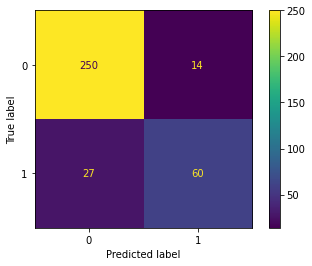

In [67]:
y = coloc_set['true colocalization']
X = coloc_set[['coloc - Spot Contrast', 'coloc - Spot Area [px²]', 'coloc - Spot To Region Intensity']]

c = tree.DecisionTreeClassifier(max_depth = 3)
m = c.fit(X,y)

p = m.predict(X)

print(classification_report(y,p))
ConfusionMatrixDisplay.from_predictions(y, p)

In [68]:
import graphviz
import os

os.environ['PATH'] += os.pathsep + 'C:/Program Files/Graphviz/bin'  # SETUP PATH VARIABLE

dot_data = tree.export_graphviz(m, feature_names = X.columns.array, class_names = ['pos', 'neg'],
                                impurity = False, node_ids = False)
graphviz.Source(dot_data)

graph = graphviz.Source(dot_data)
graph.render('m')


'm.pdf'

In [69]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [70]:
c_rf = RandomForestClassifier(n_estimators = 10, max_features = 1)
m_rf = c_rf.fit(X, y)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       264
           1       0.99      0.95      0.97        87

    accuracy                           0.99       351
   macro avg       0.99      0.98      0.98       351
weighted avg       0.99      0.99      0.99       351



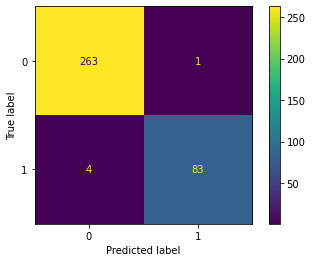

In [71]:
p_rf = m_rf.predict(X)

print(classification_report(y,p_rf))
ConfusionMatrixDisplay.from_predictions(y, p_rf)

In [74]:
coloc_set_minus = opera_to_df('real_data/Objects_Population - coloc_wt_minus.csv')
X = coloc_set_minus[['coloc - Spot Contrast', 'coloc - Spot Area [px²]', 'coloc - Spot To Region Intensity']]

In [85]:
predictions = m.predict(X)
coloc_set_minus['pred_pos'] = predictions

In [87]:
coloc_set_minus = coloc_set_minus.sort_values(by = ['pred_pos'], ascending = False)
coloc_set_minus

,Row,Column,Plane,Timepoint,Field,Object No,X,Y,Bounding Box,Position X [µm],Position Y [µm],coloc - Spot Contrast,coloc - Spot Area [px²],coloc - Spot To Region Intensity,coloc - Object No in Nuclei Selected,coloc - Object No in Spots AR,pred_pos
533,4,7,5,25,7,1,492,356,"[489,353,497,360]",-1378.37,-1507.65,0.115351,57,1.477900,1,1,1
604,4,7,3,32,9,3,864,755,"[859,750,868,762]",614.00,-1566.73,0.108100,83,1.012470,22,24,1
995,4,7,7,58,8,1,850,2116,"[846,2112,855,2120]",-356.76,-1767.78,0.105622,59,1.167951,22,47,1
1070,4,7,8,30,9,3,1237,282,"[1233,279,1242,288]",669.06,-1496.87,0.094047,54,1.098770,7,7,1
1210,4,7,7,53,8,3,830,2142,"[826,2138,834,2147]",-359.80,-1771.64,0.259337,75,1.587470,11,16,1
1209,4,7,7,53,8,2,835,2104,"[832,2101,839,2110]",-358.99,-1766.20,0.209730,61,1.558310,11,15,1
1347,4,7,5,30,9,4,990,837,"[986,832,996,844]",632.58,-1578.80,0.111689,90,1.075960,13,20,1
1208,4,7,7,53,8,1,873,2080,"[870,2076,878,2086]",-353.38,-1762.65,0.093928,66,1.269740,11,13,1
1350,4,7,7,58,9,1,571,25,"[567,21,575,31]",570.64,-1458.90,0.094595,81,1.290590,1,2,1
710,4,7,8,47,9,1,1666,846,"[1662,842,1669,852]",732.41,-1580.16,0.108777,55,1.515141,21,30,1
